In [1]:
import h5py as h5
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import calendar as cal
import seaborn as sns
import datetime as dt
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
path = '/home/sadat/Documents/DSE/Data/yogurt.h5'

##Analyze yogurt.h5 structure

In [3]:
data = h5.File(path)

def printname(name):   
    print(name)

data.visit(printname)

drug
drug/_i_table
drug/_i_table/index
drug/_i_table/index/abounds
drug/_i_table/index/bounds
drug/_i_table/index/indices
drug/_i_table/index/indicesLR
drug/_i_table/index/mbounds
drug/_i_table/index/mranges
drug/_i_table/index/ranges
drug/_i_table/index/sorted
drug/_i_table/index/sortedLR
drug/_i_table/index/zbounds
drug/table
groc
groc/_i_table
groc/_i_table/index
groc/_i_table/index/abounds
groc/_i_table/index/bounds
groc/_i_table/index/indices
groc/_i_table/index/indicesLR
groc/_i_table/index/mbounds
groc/_i_table/index/mranges
groc/_i_table/index/ranges
groc/_i_table/index/sorted
groc/_i_table/index/sortedLR
groc/_i_table/index/zbounds
groc/table
panel
panel/_i_table
panel/_i_table/index
panel/_i_table/index/abounds
panel/_i_table/index/bounds
panel/_i_table/index/indices
panel/_i_table/index/indicesLR
panel/_i_table/index/mbounds
panel/_i_table/index/mranges
panel/_i_table/index/ranges
panel/_i_table/index/sorted
panel/_i_table/index/sortedLR
panel/_i_table/index/zbounds
panel/ta

In [4]:
data.close()

##Panel data

In [5]:
df = pd.read_hdf(path, key='panel')

In [6]:
df.head()

,COLUPC,DOLLARS,IRI_KEY,MINUTE,OUTLET,PANID,UNITS,WEEK,file
0,17047000300,0.99,1097117,5068.0,DK,3138826,1.0,1514,yogurt_PANEL_DK_1479_1530.DAT
1,17047000302,0.89,1097117,2224.0,DK,3138826,1.0,1489,yogurt_PANEL_DK_1479_1530.DAT
2,17047000650,0.89,1097117,6551.0,DK,3138826,1.0,1488,yogurt_PANEL_DK_1479_1530.DAT
3,17047000650,2.97,1097117,6177.0,DK,3182048,3.0,1526,yogurt_PANEL_DK_1479_1530.DAT
4,17047001372,1.49,1097117,973.0,DK,3184911,1.0,1495,yogurt_PANEL_DK_1479_1530.DAT


####Missing data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609107 entries, 0 to 15
Data columns (total 9 columns):
COLUPC     1609107 non-null int64
DOLLARS    1609107 non-null float64
IRI_KEY    1609107 non-null int64
MINUTE     520189 non-null float64
OUTLET     1609107 non-null object
PANID      1609107 non-null int64
UNITS      1609107 non-null float64
WEEK       1609107 non-null int64
file       1609107 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 122.8+ MB


MINUTE has missing data. Let's look at the values:

In [8]:
df[df['MINUTE'].isnull()].head()

,COLUPC,DOLLARS,IRI_KEY,MINUTE,OUTLET,PANID,UNITS,WEEK,file
0,13663200108,0.89,651444,NaN,DR,3307876,1.0,1119,yogurt_PANEL_DR_1114_1165.dat
1,13663200108,0.89,651444,NaN,DR,3333500,1.0,1148,yogurt_PANEL_DR_1114_1165.dat
2,13663200701,1.19,651444,NaN,DR,3109355,1.0,1150,yogurt_PANEL_DR_1114_1165.dat
3,13663200701,1.19,651444,NaN,DR,3807982,1.0,1151,yogurt_PANEL_DR_1114_1165.dat
4,13663200702,1.19,651444,NaN,DR,3805705,1.0,1151,yogurt_PANEL_DR_1114_1165.dat


It seems that the NaN MINUTE rows have DOLLARS information available, indicating that sales did take place.

Percentage of MINUTE NaN from each OUTLET:

In [9]:
df[df['MINUTE'].isnull()].groupby('OUTLET').count()['UNITS']/1609107*100

OUTLET
DR     0.012554
GR    67.329395
KK     0.049841
MA     0.280404
Name: UNITS, dtype: float64

It seems GR (Groceries) have 67% of its MINUTE data missing. The other outlets have less than 1% missing.

####Sales by time (MINUTE and WEEK)

In [10]:
def get_datetime(week, minute):
    week, minute = int(week), int(minute)
    # Reference orginal date is September 3, 1979
    ref_orginal = dt.date.toordinal(dt.date(1979, 9, 3))
    # Convert minutes to days, hours, minutes
    days, hours, mins = (minute / 1440), ((minute % 1440) / 60), ((minute % 1440) % 60)
    # Convert from ordinal.
    return dt.datetime.fromordinal(ref_orginal + (week - 1) * 7 + days).replace(
        hour=hours, minute=mins)

week = df['WEEK'].values
minute = df['MINUTE'].fillna(df['MINUTE'].median()).values
datetime = []

for w,m in zip(week,minute):
    datetime.append(get_datetime(w,m))

df['DATETIME']=datetime

In [11]:
df.head()

,COLUPC,DOLLARS,IRI_KEY,MINUTE,OUTLET,PANID,UNITS,WEEK,file,DATETIME
0,17047000300,0.99,1097117,5068.0,DK,3138826,1.0,1514,yogurt_PANEL_DK_1479_1530.DAT,2008-09-04 12:28:00
1,17047000302,0.89,1097117,2224.0,DK,3138826,1.0,1489,yogurt_PANEL_DK_1479_1530.DAT,2008-03-11 13:04:00
2,17047000650,0.89,1097117,6551.0,DK,3138826,1.0,1488,yogurt_PANEL_DK_1479_1530.DAT,2008-03-07 13:11:00
3,17047000650,2.97,1097117,6177.0,DK,3182048,3.0,1526,yogurt_PANEL_DK_1479_1530.DAT,2008-11-28 06:57:00
4,17047001372,1.49,1097117,973.0,DK,3184911,1.0,1495,yogurt_PANEL_DK_1479_1530.DAT,2008-04-21 16:13:00


Based on the spikes, we can tell that yogurt sales are higher during certain times of the day.

Now analyzing based on Years:

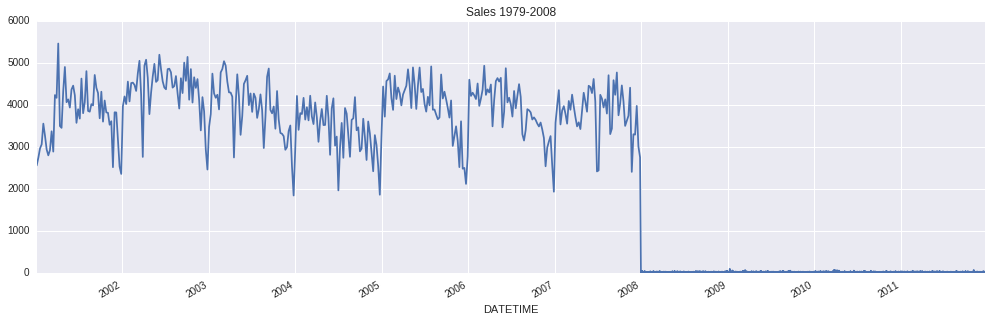

In [12]:
plt.figure(figsize=(17,5))
df.groupby('DATETIME')['DOLLARS'].sum().plot(title='Sales 1979-2008');

It seems yogurt sales dropped after 2008. Let's analyze before 2008:

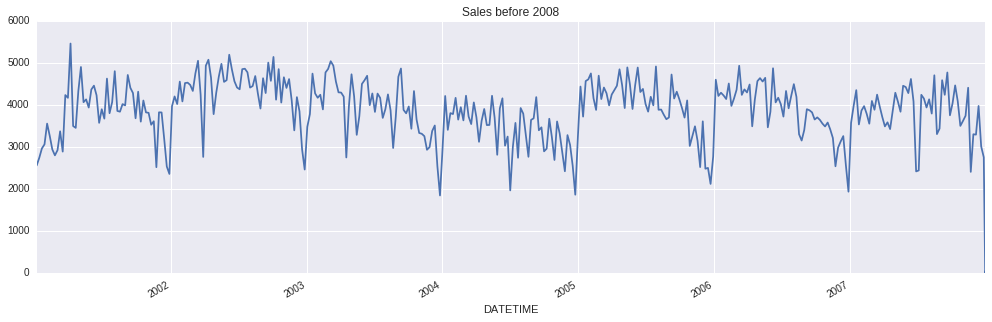

In [13]:
plt.figure(figsize=(17,5))
df[df['DATETIME']<dt.datetime(year=2008, month=1, day=1)]\
    .groupby('DATETIME')['DOLLARS'].sum().plot(title='Sales before 2008');

It seems that yogurt sales are higher at the begninning of the year compared to the end of the year. This can be confirmed later as we look at monthly sales.

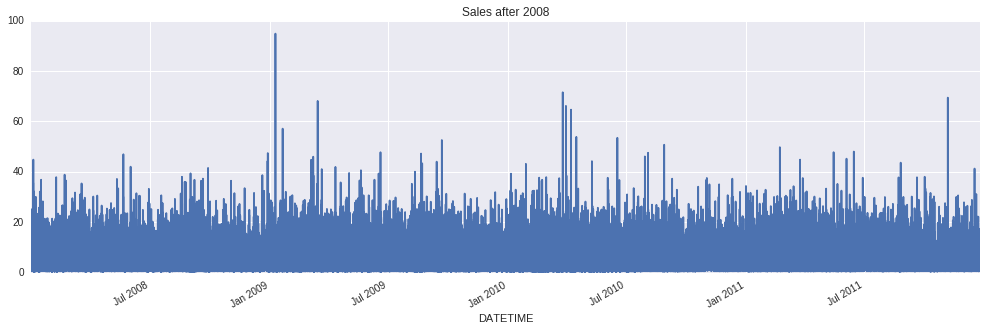

In [14]:
plt.figure(figsize=(17,5))
df[df['DATETIME']>dt.datetime(year=2008, month=1, day=1)]\
    .groupby('DATETIME')['DOLLARS'].sum().plot(title='Sales after 2008');

While there are spikes in sales of yogurt after 2008, there are no observable pattern.

Now let's look at our data by Month, Day and Hour:

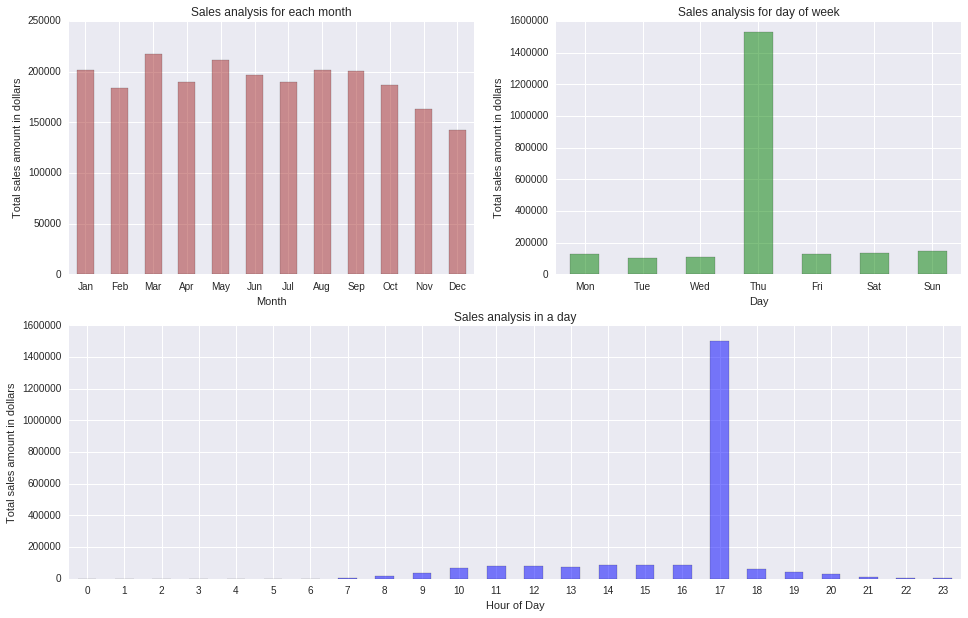

In [15]:
product_panel = df

# Setup figure
gs = plt.GridSpec(2, 2, wspace=0.2)
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Sales analysis in each month

product_sales_hour = product_panel.groupby(
    product_panel.DATETIME.dt.month)['DOLLARS'].sum()
product_sales_hour.plot(kind='bar', title="Sales analysis for each month", ax=ax1,
    rot=0, alpha=0.5, color='brown').set(
    ylabel="Total sales amount in dollars", xlabel="Month")

# Set the format for xlabels
ax1.xaxis.set_major_formatter(FuncFormatter(lambda month_num, pos : cal.month_abbr[month_num + 1]))

# Sales anaysis per day of week.
product_sales_week = product_panel.groupby(
    product_panel.DATETIME.dt.dayofweek)['DOLLARS'].sum()
product_sales_week.plot(kind='bar', title="Sales analysis for day of week", ax=ax2,
    alpha=0.5, color='g', rot=0).set(ylabel="Total sales amount in dollars", xlabel="Day")

# Set the format for xlabels
ax2.xaxis.set_major_formatter(FuncFormatter(lambda day_num, pos : cal.day_abbr[day_num]))

# Sales analysis in each hour of a day.
product_sales_hour = product_panel.groupby(
    product_panel.DATETIME.dt.hour)['DOLLARS'].sum()
product_sales_hour.plot(kind='bar', title="Sales analysis in a day", ax=ax3,
    rot=0, alpha=0.5, color='blue').set(xlabel="Hour of Day",
    ylabel="Total sales amount in dollars");


Yogurt sales seem to be consistent throughout the year. There seem to be significant increase in sales on Thursdays and 5pm.

####Sales by OUTLET

In [16]:
df.groupby('OUTLET')['DOLLARS'].sum()

OUTLET
DK     4.141000e+01
DR     3.092600e+02
GK     8.666978e+05
GR     1.410725e+06
KK     4.951500e+02
MA     4.816450e+03
MK     3.501300e+02
Name: DOLLARS, dtype: float64

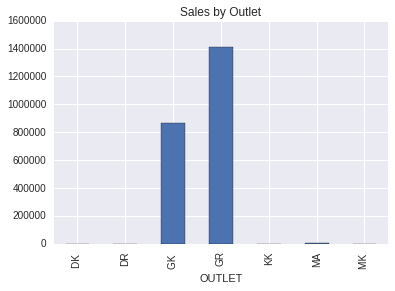

In [17]:
df.groupby('OUTLET')['DOLLARS'].sum().plot(kind='bar', title='Sales by Outlet');

GK and GR have the greatest sales. Other outlets have insignificant sales in relation.

####Conclusion

- We have a lot of NaNs in MINUTE, specifically from GR outlets.
- Between 1979-2008, people used to buy yogurt more during the beginning of the year and comparatively less throughout the year.
- Yogurt sales dropped abruptly after 2008.
- People generally buy yogurt at 5pm and on Thursdays.
- GR and GK have the highest yogurt sales among all outlets.